In [18]:
import numpy as np
import sympy as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sm.init_printing(use_unicode=True)

In [3]:
alpha = sm.symbols('alpha')
b = sm.symbols('b')
gamma = sm.symbols('gamma')
h = sm.symbols('h')
phi = sm.symbols('phi')
yt = sm.symbols('y_t')
pit = sm.symbols('pi_t')
pit_m1=sm.symbols('pi_t-1')
yt_m1 = sm.symbols('y_t-1')
vt = sm.symbols('v_t')
st = sm.symbols('s_t')
st_m1 = sm.symbols('s_t-1')
rt = sm.symbols('r_t')
it = sm.symbols('i_t')
exp_pit = sm.symbols('E[pi_t]')
exp_pit_p1 = sm.symbols('E[pi_t+1]')

Question 1

In [4]:
SRAS_pit=pit_m1-phi*gamma*yt_m1+st-phi*st_m1+gamma*yt
SRAS_pit

In [5]:
AD_pit=(1/(h*alpha))*(vt-(1+b*alpha)*yt)
AD_pit

In [6]:
AS_minus_AD= SRAS_pit-AD_pit
AS_minus_AD

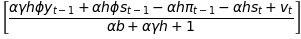

In [7]:
eq_y = sm.solve(sm.Eq(AS_minus_AD,0),yt)
eq_y

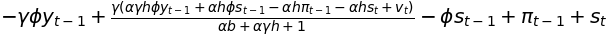

In [9]:
eq_pi= SRAS_pit.subs(yt,eq_y[0])
eq_pi

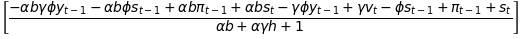

In [51]:
#not necessary
eq_pi= SRAS_pit.subs(yt,eq_yt)
eq_pii= sm.solve(sm.Eq(eq_pi,pit),pit)
eq_pii

Question 2

In [54]:
pms = {}

pms['alpha']=5.76
pms['h'] = 0.5
pms['b'] = 0.5
pms['phi'] = 0
pms['gamma'] = 0.075

In [55]:
equil_output= sm.lambdify((vt, st, pit_m1, st_m1, yt_m1, alpha, h, b, phi, gamma),eq_y[0])
def equili_output (vt, st, pit_m1, st_m1, yt_m1, alpha=pms['alpha'], h=pms['h'], b=pms['b'], phi=pms['phi'], gamma=pms['gamma']):
    return equil_output (vt, st, pit_m1, st_m1, yt_m1, alpha, h, b, phi, gamma)


In [56]:
equili_output(0,0,0,0,0)


In [57]:
equili_output(0.1,0,0,0,0)

In [64]:
equil_pi= sm.lambdify((pit_m1, yt, yt_m1, st, st_m1, gamma, phi), SRAS_pit)
def equili_pi (pit_m1, yt, yt_m1, st, st_m1, gamma=pms['gamma'], phi=pms['phi']):
    return equil_pi (pit_m1, yt, yt_m1, st, st_m1, gamma, phi)

In [65]:
equili_pi(0,0,0,0,0)

In [66]:
equili_pi(0,0.0244140625,0,0,0)

Question 3

In [67]:
pms["delta"] = 0.80
pms["omega"] = 0.15
delta = sm.symbols("delta")
omega = sm.symbols("omega")
vt_m1 = sm.symbols("v_t-1")
xt = sm.symbols("x_t")
ct = sm.symbols("c_t")


In [68]:
vt_ar = delta*vt_m1 + xt
st_ar = omega*st_m1 + ct

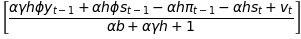

In [69]:
eq_y

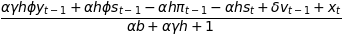

In [70]:
eq_y_ar = eq_y[0].subs(vt,vt_ar)
eq_y_ar

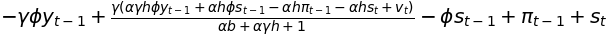

In [71]:
eq_pi

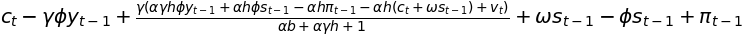

In [72]:
eq_pi_ar = eq_pi.subs(st,st_ar)
eq_pi_ar

In [73]:
equil_piii= sm.lambdify((yt_m1, yt, pit_m1, st_m1, ct, omega, gamma, phi),eq_pi_ar)
def equili_pi_ar (yt_m1, yt, pit_m1, st_m1, ct, omega=pms['omega'], gamma=pms['gamma'], phi=pms['phi']):
    return equil_piii (yt_m1, yt, pit_m1, st_m1, ct, omega, gamma, phi)

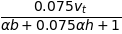

In [74]:
equili_pi_ar(0,0,0,0,0)

In [ ]:
equil_piii= sm.lambdify((yt_m1, yt, pit_m1, st_m1, ct, omega, gamma, phi),eq_pi_ar)
def equili_pi_ar (yt_m1, yt, pit_m1, st_m1, ct, omega=pms['omega'], gamma=pms['gamma'], phi=pms['phi']):
    return equil_piii (yt_m1, yt, pit_m1, st_m1, ct, omega, gamma, phi)

In [ ]:
#other approach

In [ ]:
#define shocks:
vt_ar = delta*vt_m1 + xt
st_ar = omega*st_m1 + ct

In [ ]:
#set number of periods
P= 1000
# all initial values are 0:
initial_y= 

Excercise 3: Exchange Economy 

Consider an **exchange economy** with

1. 3 goods, $(x_1,x_2,x_3)$
2. $N$ consumers indexed by \\( j \in \{1,2,\dots,N\} \\)
3. Preferences are Cobb-Douglas with log-normally distributed coefficients

    $$ \begin{eqnarray*}
    u^{j}(x_{1},x_{2},x_{3}) &=& 
    \left(x_{1}^{\beta_{1}^{j}}x_{2}^{\beta_{2}^{j}}x_{3}^{\beta_{3}^{j}}\right)^{\gamma}\\
     &  & \,\,\,\beta_{i}^{j}=\frac{\alpha_{i}^{j}}{\alpha_{1}^{j}+\alpha_{2}^{j}+\alpha_{3}^{j}} \\
     &  & \,\,\,\boldsymbol{\alpha}^{j}=(\alpha_{1}^{j},\alpha_{2}^{j},\alpha_{3}^{j}) \\ 
     &  & \,\,\,\log(\boldsymbol{\alpha}^j) \sim \mathcal{N}(\mu,\Sigma) \\
    \end{eqnarray*} $$

4. Endowments are exponentially distributed,

$$
\begin{eqnarray*}
\boldsymbol{e}^{j} &=& (e_{1}^{j},e_{2}^{j},e_{3}^{j}) \\
 &  & e_i^j \sim f, f(z;\zeta) =  1/\zeta \exp(-z/\zeta)
\end{eqnarray*}
$$

Let $p_3 = 1$ be the **numeraire**. The implied **demand functions** are:

$$
\begin{eqnarray*}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j})&=&\beta^{j}_i\frac{I^j}{p_{i}} \\
\end{eqnarray*}
$$

where consumer $j$'s income is

$$I^j = p_1 e_1^j + p_2 e_2^j +p_3 e_3^j$$

In [19]:
#parameters:
N = 50000 
mu = np.array([3,2,1]) 
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]]) 
gamma = 0.8 
zeta = 1

#seed
seed = 1986 
np.random.seed(seed)

#preferances
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N)) 
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

#endowments
e1 = np.random.exponential(zeta,size=N) 
e2 = np.random.exponential(zeta,size=N) 
e3 = np.random.exponential(zeta,size=N) 

Exercise 3.1

<function matplotlib.pyplot.show(*args, **kw)>

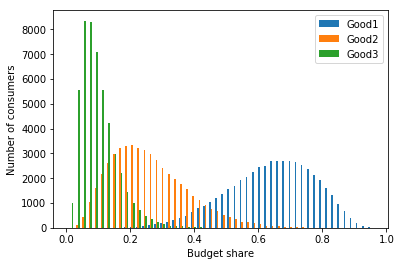

In [20]:
plt.hist(betas, bins = 50, label= ("Good1", 'Good2', 'Good3'))
plt.legend()
plt.xlabel('Budget share')
plt.ylabel('Number of consumers')
plt.show

Exercise 3.2

In [21]:
#demand functions
# We can eliminate p3 from the demand function, as it is equal to 1 (with p3*e3=e3)

def demand_good1 (betas, p1, e1, p2, e2, e3):
    I= p1*e1 + p2*e2 + e3
    return betas*(I/p1)

def demand_good2 (betas, p1, e1, p2, e2, e3):
    I= p1*e1 + p2*e2 + e3
    return betas*(I/p2)

def demand_good3 (betas, p1, e1, p2, e2, e3):
    I= p1*e1 + p2*e2 + e3
    return betas*(I)

In [22]:
#excess demand functions:

def excess_demand_good1(betas, p1, e1, p2, e2, e3):

    #demand
    demand = np.sum(demand_good1(betas, p1, e1, p2, e2, e3))
    
    #supply
    supply= np.sum(e1)
    
    #excess demand
    excess_demand= demand-supply
    
    return excess_demand

In [27]:
def excess_demand_good2(betas, p1, e1, p2, e2, e3):
    
    #demand
    demand= np.sum(demand_good2(betas, p1, e1, p2, e2, e3))
  
    #supply
    supply= np.sum(e2)
    
    #excess demand
    excess_demand= demand- supply
    
    return excess_demand

In [32]:
# make a 3d plot of excess demand

p1_vec = np.linspace(0.1,10,50000)
p2_vec = np.linspace(0.1,10,50000)
p1_grid,p2_grid = np.meshgrid(p1_vec,p2_vec,indexing='ij')
excess_demand_good1_grid = excess_demand_good1(betas,p1_grid,e1,p2_grid,e2,e3)

fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
cs = ax.plot_surface(p1_grid,p2_grid,excess_demand_good1_grid,cmap=cm.jet)

# c. add labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f$')

# d. invert xaxis
ax.invert_xaxis()

# e. remove background
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# f. add colorbar
fig.colorbar(cs);
plt.show()

MemoryError: 

In [ ]:
#Excercise 3

In [ ]:
def find_equilibrium(betas, p1, e1, p2, e2, e3, kappa=0.5,eps=1e-8,maxiter=500):
    
    t = 0
    while True:

        # a. step 1: excess demand
        Z1 = excess_demand_good_1_func(alphas,p1,p2,k)
        
        # b: step 2: stop?
        if  np.abs(Z1) < eps or t >= maxiter:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
            break    
    
        # c. step 3: update p1
        p1 = p1 + kappa*Z1/alphas.size
            
        # d. step 4: return 
        if t < 5 or t%25 == 0:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
        elif t == 5:
            print('   ...')
            
        t += 1    

    return p1